<a href="https://colab.research.google.com/github/fralfaro/MAT281_2024/blob/main/docs/labs/lab_09.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>


# MAT281 - Laboratorio N°09

<a id='p1'></a>
## I.- Problema 01


<img src="https://www.svgrepo.com/show/1064/virus.svg" width = "300" align="center"/>

El **cáncer de mama** es una proliferación maligna de células epiteliales en los conductos o lobulillos mamarios. Esta enfermedad clonal surge cuando una célula adquiere, a través de mutaciones, la capacidad de dividirse sin control, formando un tumor que puede invadir tejidos vecinos y propagarse a otras partes del cuerpo.

El conjunto de datos `BC.csv` contiene información sobre pacientes con tumores (benignos o malignos) y diversas características del tumor, calculadas a partir de imágenes digitalizadas de aspirados con aguja fina (FNA) de masas mamarias. Estas características describen los núcleos celulares en la imagen y permiten diferenciar entre tumores benignos y malignos.

A continuación, cargamos el conjunto de datos:

In [1]:
# Importar librerías
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Importar herramientas de Scikit-learn
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score

# Configuración de gráficos
%matplotlib inline
sns.set_palette("deep", desat=0.6)
sns.set(rc={'figure.figsize': (11.7, 8.27)})

# Cargar y preparar los datos
df = pd.read_csv("https://raw.githubusercontent.com/fralfaro/MAT281_2024/main/docs/labs/data/BC.csv")
df.set_index('id', inplace=True)

# Transformación de la variable objetivo
df['diagnosis'] = df['diagnosis'].replace({'M': 1, 'B': 0}).astype(int)

# Visualizar las primeras filas del DataFrame
df.head()

<ipython-input-1-ede4ca97064c>:26: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  df['diagnosis'] = df['diagnosis'].replace({'M': 1, 'B': 0}).astype(int)


,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,symmetry_mean,...,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst
id,,,,,,,,,,,,,,,,,,,,,
842302,1,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,0.2419,...,25.38,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890
842517,1,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,0.1812,...,24.99,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902
84300903,1,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,0.2069,...,23.57,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758
84348301,1,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,0.2597,...,14.91,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300
84358402,1,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,0.1809,...,22.54,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678


Con base en la información presentada, responde las siguientes preguntas. Asegúrate de incluir el código necesario para realizar los análisis requeridos y proporciona una breve explicación que describa tus resultados y el proceso que seguiste.




1. Realice un análisis exploratorio del conjunto de datos.

Primero vemos las estadísticas descriptivas

In [2]:
df.describe()

,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,symmetry_mean,...,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst
count,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,...,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000
mean,0.372583,14.127292,19.289649,91.969033,654.889104,0.096360,0.104341,0.088799,0.048919,0.181162,...,16.269190,25.677223,107.261213,880.583128,0.132369,0.254265,0.272188,0.114606,0.290076,0.083946
std,0.483918,3.524049,4.301036,24.298981,351.914129,0.014064,0.052813,0.079720,0.038803,0.027414,...,4.833242,6.146258,33.602542,569.356993,0.022832,0.157336,0.208624,0.065732,0.061867,0.018061
min,0.000000,6.981000,9.710000,43.790000,143.500000,0.052630,0.019380,0.000000,0.000000,0.106000,...,7.930000,12.020000,50.410000,185.200000,0.071170,0.027290,0.000000,0.000000,0.156500,0.055040
25%,0.000000,11.700000,16.170000,75.170000,420.300000,0.086370,0.064920,0.029560,0.020310,0.161900,...,13.010000,21.080000,84.110000,515.300000,0.116600,0.147200,0.114500,0.064930,0.250400,0.071460
50%,0.000000,13.370000,18.840000,86.240000,551.100000,0.095870,0.092630,0.061540,0.033500,0.179200,...,14.970000,25.410000,97.660000,686.500000,0.131300,0.211900,0.226700,0.099930,0.282200,0.080040
75%,1.000000,15.780000,21.800000,104.100000,782.700000,0.105300,0.130400,0.130700,0.074000,0.195700,...,18.790000,29.720000,125.400000,1084.000000,0.146000,0.339100,0.382900,0.161400,0.317900,0.092080
max,1.000000,28.110000,39.280000,188.500000,2501.000000,0.163400,0.345400,0.426800,0.201200,0.304000,...,36.040000,49.540000,251.200000,4254.000000,0.222600,1.058000,1.252000,0.291000,0.663800,0.207500


Luego visualizamos la distribución de los 2 tipos de tumores,

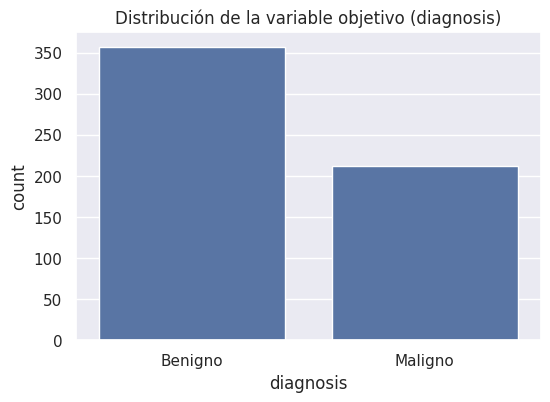

In [3]:
plt.figure(figsize=(6,4))
sns.countplot(x='diagnosis', data=df)
plt.title("Distribución de la variable objetivo (diagnosis)")
plt.xticks([0, 1], ["Benigno", "Maligno"])
plt.show()

y observamos la correlación entre las variables.

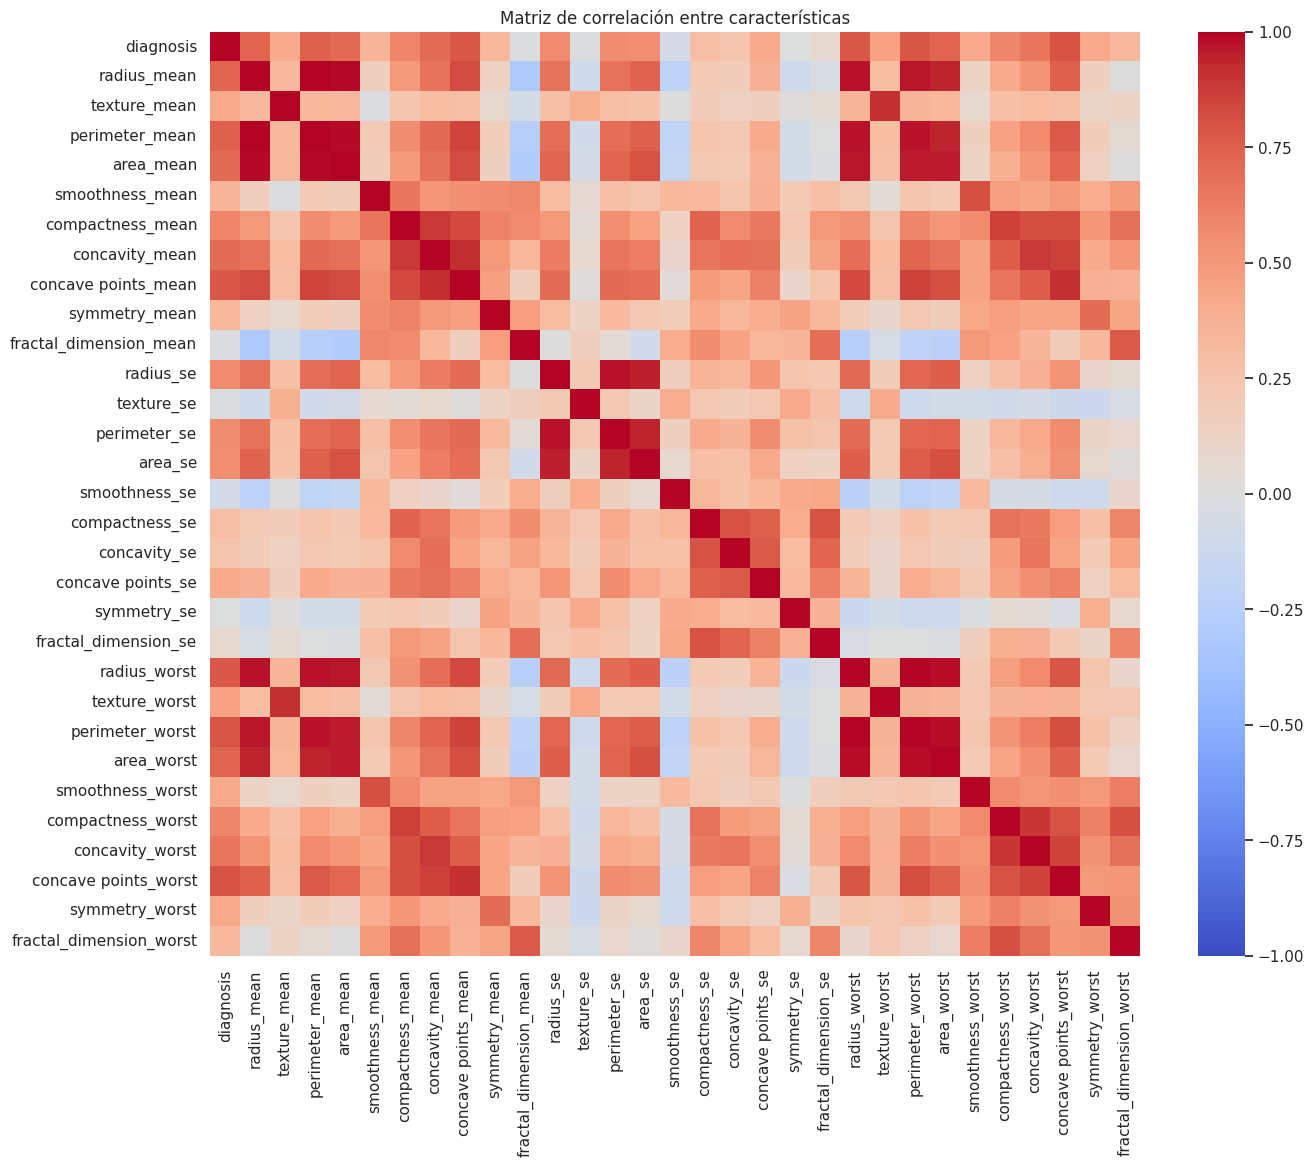

In [4]:
plt.figure(figsize=(15,12))
correlation_matrix = df.corr()
sns.heatmap(correlation_matrix, annot=False, cmap='coolwarm', vmin=-1, vmax=1)
plt.title("Matriz de correlación entre características")
plt.show()

2. Normalizar las variables numéricas con el método **StandardScaler**.

In [5]:
X = df.drop(columns=['diagnosis'])
y = df['diagnosis']

# Aplicamos normalización con StandardScaler
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Visualizamos
X_scaled_df = pd.DataFrame(X_scaled, columns=X.columns, index=X.index)
X_scaled_df.head()

,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,symmetry_mean,fractal_dimension_mean,...,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst
id,,,,,,,,,,,,,,,,,,,,,
842302,1.097064,-2.073335,1.269934,0.984375,1.568466,3.283515,2.652874,2.532475,2.217515,2.255747,...,1.886690,-1.359293,2.303601,2.001237,1.307686,2.616665,2.109526,2.296076,2.750622,1.937015
842517,1.829821,-0.353632,1.685955,1.908708,-0.826962,-0.487072,-0.023846,0.548144,0.001392,-0.868652,...,1.805927,-0.369203,1.535126,1.890489,-0.375612,-0.430444,-0.146749,1.087084,-0.243890,0.281190
84300903,1.579888,0.456187,1.566503,1.558884,0.942210,1.052926,1.363478,2.037231,0.939685,-0.398008,...,1.511870,-0.023974,1.347475,1.456285,0.527407,1.082932,0.854974,1.955000,1.152255,0.201391
84348301,-0.768909,0.253732,-0.592687,-0.764464,3.283553,3.402909,1.915897,1.451707,2.867383,4.910919,...,-0.281464,0.133984,-0.249939,-0.550021,3.394275,3.893397,1.989588,2.175786,6.046041,4.935010
84358402,1.750297,-1.151816,1.776573,1.826229,0.280372,0.539340,1.371011,1.428493,-0.009560,-0.562450,...,1.298575,-1.466770,1.338539,1.220724,0.220556,-0.313395,0.613179,0.729259,-0.868353,-0.397100


3. Realizar un método de reducción de dimensionalidad visto en clases.

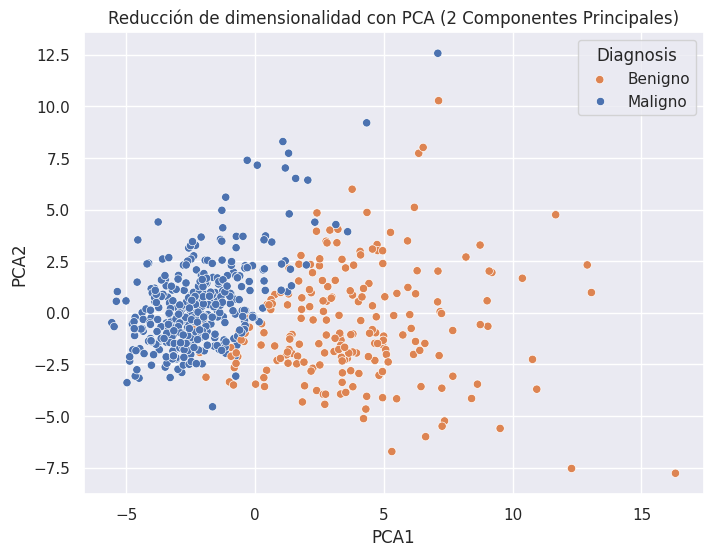

In [6]:
pca = PCA(n_components=2)
X_pca = pca.fit_transform(X_scaled)

# Convertir a DataFrame para mejor visualización
X_pca_df = pd.DataFrame(X_pca, columns=['PCA1', 'PCA2'], index=X.index)

# Visualización de los datos transformados
plt.figure(figsize=(8,6))
sns.scatterplot(x='PCA1', y='PCA2', hue=y, data=X_pca_df, palette='deep')
plt.title("Reducción de dimensionalidad con PCA (2 Componentes Principales)")
plt.xlabel("PCA1")
plt.ylabel("PCA2")
plt.legend(title="Diagnosis", labels=["Benigno", "Maligno"])
plt.show()

4. Aplique al menos tres modelos de clasificación distintos. Para cada uno de los modelos escogidos, realice una optimización de los hiperparámetros. además, calcule las respectivas métricas. Concluya.

Primero dividimos el conjunto de datos en train y test

In [7]:
X_train, X_test, y_train, y_test = train_test_split(X_pca, y, test_size=0.3, random_state=42, stratify=y)

### Modelo Regresión Logistica

Definimos el modelo y los hiperparámetros


In [8]:
l_model = LogisticRegression()
l_param_grid = {'C': [0.1, 1, 10, 100],'penalty': ['l1', 'l2'],'solver': ['liblinear']}

# Optimizamos hiperparámetros
l_grid_search = GridSearchCV(l_model, l_param_grid, cv=5, scoring='accuracy')
l_grid_search.fit(X_train, y_train)

GridSearchCV(cv=5, estimator=LogisticRegression(),
             param_grid={'C': [0.1, 1, 10, 100], 'penalty': ['l1', 'l2'],
                         'solver': ['liblinear']},
             scoring='accuracy')

Elegimos el mejor modelo y calculamos las métricas

In [9]:
best_l_model = l_grid_search.best_estimator_

# Predicción y cálculo de métricas
y_pred = best_l_model.predict(X_test)
l_accuracy = accuracy_score(y_test, y_pred)
l_precision = precision_score(y_test, y_pred)
l_recall = recall_score(y_test, y_pred)
l_f1 = f1_score(y_test, y_pred)

# Mostramos los resultados
print("Regresión Logística:")
print(f"Accuracy: {l_accuracy}")
print(f"Precision: {l_precision}")
print(f"Recall: {l_recall}")
print(f"F1 Score: {l_f1}")

Regresión Logística:
Accuracy: 0.9415204678362573
Precision: 0.9821428571428571
Recall: 0.859375
F1 Score: 0.9166666666666666


### Modelo SVM

Definimos el modelo y los hiperparámetros

In [10]:
svm_model = SVC()
svm_param_grid = {'C': [0.1, 1, 10, 100],'kernel': ['linear', 'rbf', 'poly'],'gamma': ['scale', 'auto']}

svm_grid_search = GridSearchCV(svm_model, svm_param_grid, cv=5, scoring='accuracy')
svm_grid_search.fit(X_train, y_train)

GridSearchCV(cv=5, estimator=SVC(),
             param_grid={'C': [0.1, 1, 10, 100], 'gamma': ['scale', 'auto'],
                         'kernel': ['linear', 'rbf', 'poly']},
             scoring='accuracy')

Elegimos el mejor modelo y calculamos las métricas

In [11]:
best_svm_model = svm_grid_search.best_estimator_

y_pred = best_svm_model.predict(X_test)
svm_accuracy = accuracy_score(y_test, y_pred)
svm_precision = precision_score(y_test, y_pred)
svm_recall = recall_score(y_test, y_pred)
svm_f1 = f1_score(y_test, y_pred)

print("SVM:")
print(f"Accuracy: {svm_accuracy}")
print(f"Precision: {svm_precision}")
print(f"Recall: {svm_recall}")
print(f"F1 Score: {svm_f1}")

SVM:
Accuracy: 0.9415204678362573
Precision: 0.9821428571428571
Recall: 0.859375
F1 Score: 0.9166666666666666


### Modelo XGBoost

Definimos el modelo y los hiperparámetros

In [12]:
from xgboost import XGBClassifier

xgb_model = XGBClassifier(use_label_encoder=False, eval_metric='logloss', random_state=42)
xgb_param_grid = {'n_estimators': [50, 100, 200],'max_depth': [3, 5, 7],'learning_rate': [0.01, 0.1, 0.2],'subsample': [0.8, 1.0],'colsample_bytree': [0.8, 1.0]}

xgb_grid_search = GridSearchCV(xgb_model, xgb_param_grid, cv=5, scoring='accuracy')
xgb_grid_search.fit(X_train, y_train)

/usr/local/lib/python3.10/dist-packages/xgboost/core.py:158: UserWarning: [01:41:34] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)
/usr/local/lib/python3.10/dist-packages/xgboost/core.py:158: UserWarning: [01:41:35] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)
/usr/local/lib/python3.10/dist-packages/xgboost/core.py:158: UserWarning: [01:41:35] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)
/usr/local/lib/python3.10/dist-packages/xgboost/core.py:158: UserWarning: [01:41:35] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)
/usr/local/lib/python3.10/dist-packages/xgboost/core.py:158: UserWarning: [01:41:35] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "use_label_e

GridSearchCV(cv=5,
             estimator=XGBClassifier(base_score=None, booster=None,
                                     callbacks=None, colsample_bylevel=None,
                                     colsample_bynode=None,
                                     colsample_bytree=None, device=None,
                                     early_stopping_rounds=None,
                                     enable_categorical=False,
                                     eval_metric='logloss', feature_types=None,
                                     gamma=None, grow_policy=None,
                                     importance_type=None,
                                     interaction_constraints=None,
                                     learning_rate=...
                                     max_delta_step=None, max_depth=None,
                                     max_leaves=None, min_child_weight=None,
                                     missing=nan, monotone_constraints=None,
                                     multi_strategy=None, n_estimators=None,
                                     n_jobs=None, num_parallel_tree=None,
                                     random_state=42, ...),
             param_grid={'colsample_bytree': [0.8, 1.0],
                         'learning_rate': [0.01, 0.1, 0.2],
                         'max_depth': [3, 5, 7], 'n_estimators': [50, 100, 200],
                         'subsample': [0.8, 1.0]},
             scoring='accuracy')

Elegimos el mejor modelo y calculamos las métricas

In [13]:
best_xgb_model = xgb_grid_search.best_estimator_

y_pred = best_xgb_model.predict(X_test)
xgb_accuracy = accuracy_score(y_test, y_pred)
xgb_precision = precision_score(y_test, y_pred)
xgb_recall = recall_score(y_test, y_pred)
xgb_f1 = f1_score(y_test, y_pred)

# Mostramos los resultados
print("XGBoost:")
print(f"Accuracy: {xgb_accuracy}")
print(f"Precision: {xgb_precision}")
print(f"Recall: {xgb_recall}")
print(f"F1 Score: {xgb_f1}")

XGBoost:
Accuracy: 0.9532163742690059
Precision: 1.0
Recall: 0.875
F1 Score: 0.9333333333333333


Podemos concluir que los 3 modelos son buenos en este caso, ya que presentan altos resultados en las metricas de precisión, sobretodo el último modelo presenta muy buen resulrtado en F1 score alcanzando un 93%, por lo tanto, nos decantmos por este último como mejor modelo.